# **Overview**

### Holidays are upon us, and whatever the current circumstances, gifts of any form hopefully helps us feel better. This looks at the shopping trends, focusing mainly on the various factors those can influence the purchase amounts and consequently, the incomes.

### Contents:

1. **Import Required Libraries [1]**
2. **Load the Datasets [2]**
3. **Perform Exploratory Data Anlysis [3-54]**
4. **Clean the Data**
5. **Visualize Data[55-65]**
6. **Key Insights**

Import Required Libraries

In [1]:
import os

import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import seaborn as sns

from sklearn.preprocessing import LabelEncoder 

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
palette = 'Spectral'
sns.set_palette(palette = palette)

/kaggle/input/consumer-behavior-and-shopping-habits-dataset/shopping_behavior_updated.csv
/kaggle/input/consumer-behavior-and-shopping-habits-dataset/shopping_trends.csv


Load the DatasetsLoad the Datasets

We had added the above dataset from Kaggle for analysis. Now let's read it into a dataframe.

In [2]:
shopping_behavior = pd.read_csv('/kaggle/input/consumer-behavior-and-shopping-habits-dataset/shopping_behavior_updated.csv')

shopping_behavior.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


Perform Exploratory Data AnlysisPerform Exploratory Data Anlysis

In [3]:
shopping_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [4]:
shopping_behavior.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


Let's check for duplicate values

In [5]:
shopping_behavior.duplicated().sum()

0

Good, there seems to be no duplicate values.

Let's also look if they are any null values

In [6]:
shopping_behavior.isnull().values.any()

False

Good, there are no null values as well. Otherwise we will need to handle them. Now lets move on.

Next we will typical wish to check out unique values / catgories of the key attributes we are interested in.

<Axes: xlabel='Category'>

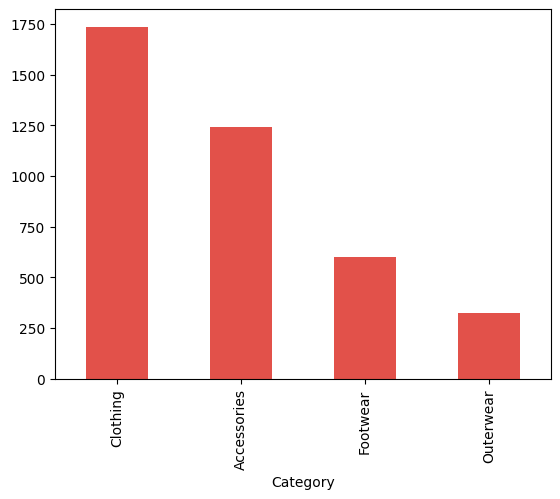

In [7]:
shopping_behavior['Category'].value_counts().plot(kind='bar')

<Axes: xlabel='Season'>

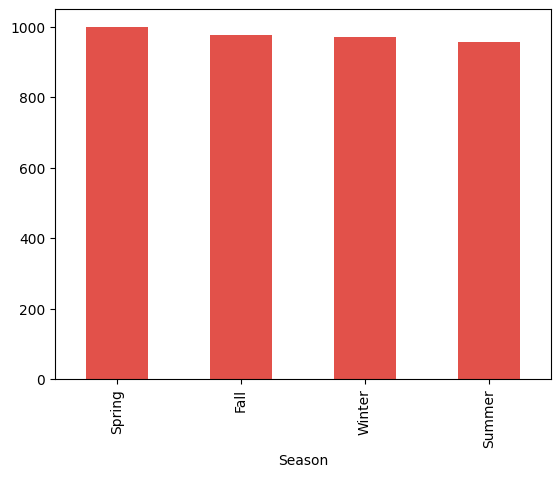

In [8]:
shopping_behavior['Season'].value_counts().plot(kind='bar')

<Axes: xlabel='Payment Method'>

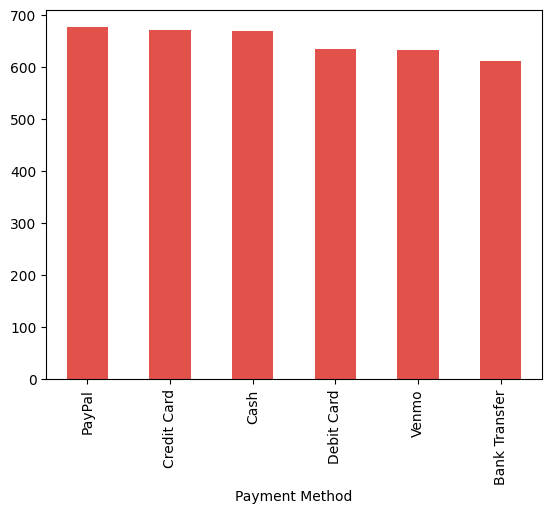

In [9]:
shopping_behavior['Payment Method'].value_counts().plot(kind='bar')

Let's group the above into categories for our analysis

<Axes: xlabel='Payment Category'>

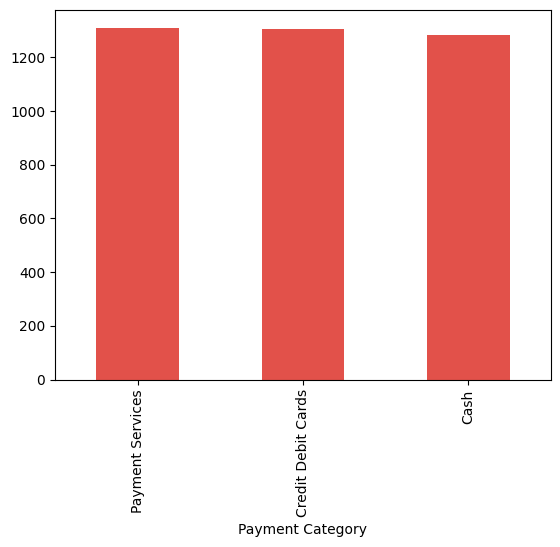

In [10]:
shopping_behavior['Payment Category'] = ''
shopping_behavior.loc[shopping_behavior['Payment Method'].isin(['Credit Card', 'Debit Card'])   ,'Payment Category'] = 'Credit Debit Cards'
shopping_behavior.loc[shopping_behavior['Payment Method'].isin(['PayPal', 'Venmo'])   ,'Payment Category'] = 'Payment Services'
shopping_behavior.loc[shopping_behavior['Payment Method'].isin(['Cash', 'Bank Transfer'])   ,'Payment Category'] = 'Cash'

shopping_behavior['Payment Category'].value_counts().plot(kind='bar')

We can conclude the payment methods are evenly distributed across the dataset.

<Axes: xlabel='Shipping Type'>

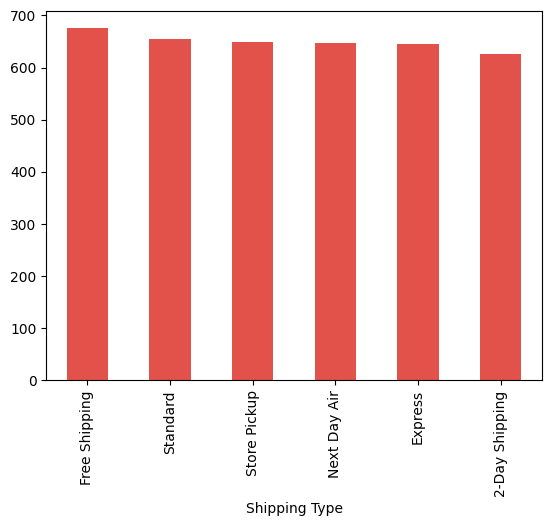

In [11]:
shopping_behavior['Shipping Type'].value_counts().plot(kind='bar')

Does the season affect the shopping type?

<Axes: xlabel='Season'>

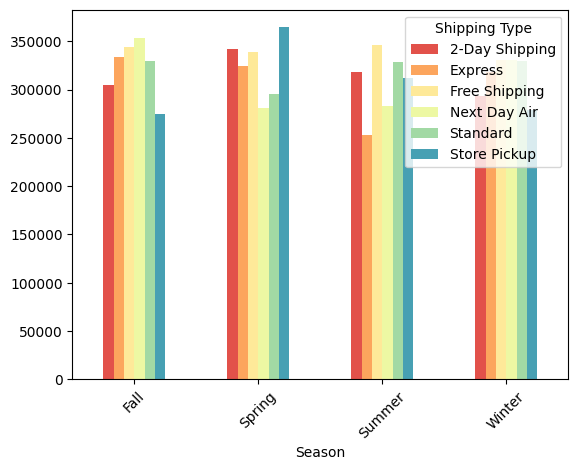

In [12]:
shopping_behavior.groupby(['Season', 'Shipping Type'])['Customer ID'].sum().unstack(1).plot.bar(rot=45)

This looks better but it's messy. We will need to order both the Seasons and Shipping Type for a better picture.

In this case, they are both categoricals so the default sorting is alphabetically. To order them to aid in our analysis, we will need to do the following:

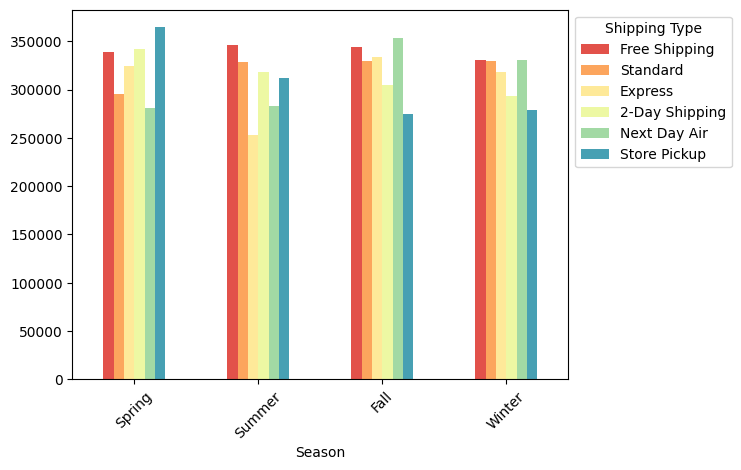

In [13]:
season = CategoricalDtype(['Spring', 'Summer', 'Fall', 'Winter'], ordered=True)
shopping_behavior['Season'] = shopping_behavior['Season'].astype(season)

shipping_type = CategoricalDtype(['Free Shipping', 'Standard', 'Express', 
                                  '2-Day Shipping', 'Next Day Air',
                                  'Store Pickup'], ordered=True)
shopping_behavior['Shipping Type'] = shopping_behavior['Shipping Type'].astype(shipping_type)

ax = shopping_behavior.groupby(['Season', 'Shipping Type'])['Customer ID'].sum().unstack(1).plot.bar(rot=45)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


Much better.

Let's also dive into a few other interesting attributes to see if we can uncover anymore patterns.

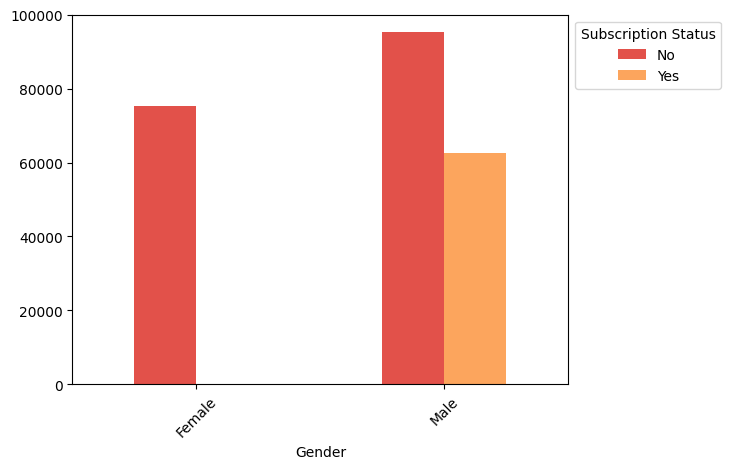

In [14]:
ax = shopping_behavior.groupby(['Gender', 'Subscription Status'])['Purchase Amount (USD)'].sum().unstack(1).plot.bar(rot=45)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

This is actually interesting. I wasn't quite expecting this result :)

Let's dig more into this similar issue to uncover if there are any accompanying trends

In [15]:
## discount and coupon codes
shopping_behavior['Discount Applied'].value_counts()

Discount Applied
No     2223
Yes    1677
Name: count, dtype: int64

In [16]:
shopping_behavior['Promo Code Used'].value_counts()

Promo Code Used
No     2223
Yes    1677
Name: count, dtype: int64

In [17]:
shopping_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Customer ID             3900 non-null   int64   
 1   Age                     3900 non-null   int64   
 2   Gender                  3900 non-null   object  
 3   Item Purchased          3900 non-null   object  
 4   Category                3900 non-null   object  
 5   Purchase Amount (USD)   3900 non-null   int64   
 6   Location                3900 non-null   object  
 7   Size                    3900 non-null   object  
 8   Color                   3900 non-null   object  
 9   Season                  3900 non-null   category
 10  Review Rating           3900 non-null   float64 
 11  Subscription Status     3900 non-null   object  
 12  Shipping Type           3900 non-null   category
 13  Discount Applied        3900 non-null   object  
 14  Promo Code Used         

In [18]:
shopping_behavior['Discount Promo Codes'] = 'Yes'

shopping_behavior.loc[(shopping_behavior['Discount Applied']=='Yes')| (shopping_behavior['Promo Code Used']=='Yes'),'Discount Promo Codes'] = 'No'

shopping_behavior['Discount Promo Codes'].value_counts()

Discount Promo Codes
Yes    2223
No     1677
Name: count, dtype: int64

In this case, Discount Applied and Promo Code Used refer to the same thing but they may not. We may choose to perform some logic which I have done in the above to be scalable. Otherwise to simplify things, we may wish to drop 1 redundant column.  It really depends on the context and dataset.

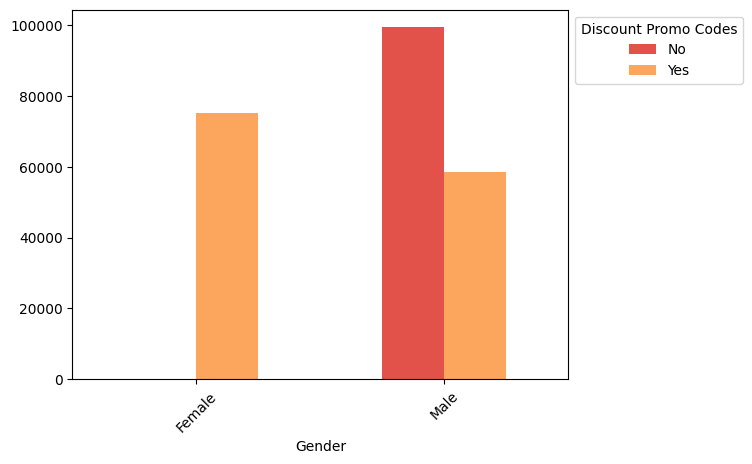

In [19]:
ax = shopping_behavior.groupby(['Gender', 'Discount Promo Codes'])['Purchase Amount (USD)'].sum().unstack(1).plot.bar(rot=45)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Wow! The results are now reversed! :)

In [20]:
crosstab_res = pd.crosstab(index=shopping_behavior['Discount Promo Codes'],columns = shopping_behavior['Subscription Status'])
crosstab_res

Subscription Status,No,Yes
Discount Promo Codes,,
No,624,1053
Yes,2223,0


In [21]:
from scipy.stats import chi2_contingency

# Performing Chi-sq test
chisq_res = chi2_contingency(crosstab_res)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the Chi Sq Test is:', chisq_res[1])

The P-Value of the Chi Sq Test is: 0.0


The H0 used in the Chi-square test means he variables are not correlated with each other. Since the P-value is zero, H0 will NOT be accepted - this means 'Discount Promo Codes' is highly correlated to 'Subscription Status', which makes sense as regular subcribers may already enjoy a subscription incentive and have no need (or probably not eligible) to stack on any other discounts or promo codes.

Let's look at the bigger picture for overall correlation

In [22]:
col_type = shopping_behavior.dtypes
col_names = list(shopping_behavior)

cat_var_index = [i for i, x in enumerate(col_type) if ((x == 'object')|(x == 'string')|(x == 'category'))]

cat_var_name = [x for i, x in enumerate(col_names) if i in cat_var_index]

cat_var_df = pd.DataFrame({'cat_ind': cat_var_index, 
                           'cat_name': cat_var_name})
cat_var_df

,cat_ind,cat_name
0,2,Gender
1,3,Item Purchased
2,4,Category
3,6,Location
4,7,Size
5,8,Color
6,9,Season
7,11,Subscription Status
8,12,Shipping Type
9,13,Discount Applied


In [23]:
cat_var_name

['Gender',
 'Item Purchased',
 'Category',
 'Location',
 'Size',
 'Color',
 'Season',
 'Subscription Status',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Payment Method',
 'Frequency of Purchases',
 'Payment Category',
 'Discount Promo Codes']

In [24]:
label_list = []
cat_list = cat_var_df.loc[:, 'cat_name']
cat_list

0                     Gender
1             Item Purchased
2                   Category
3                   Location
4                       Size
5                      Color
6                     Season
7        Subscription Status
8              Shipping Type
9           Discount Applied
10           Promo Code Used
11            Payment Method
12    Frequency of Purchases
13          Payment Category
14      Discount Promo Codes
Name: cat_name, dtype: object

In [25]:
shopping_behavior_vector = shopping_behavior

for index, cat_feature in enumerate(cat_list): 

    le = LabelEncoder()

    le.fit(shopping_behavior.loc[:, cat_feature])    
    label_list.append(list(le.classes_))

    shopping_behavior.loc[:, cat_feature] = le.transform(shopping_behavior.loc[:, cat_feature])

In [26]:
shopping_behavior_vector = shopping_behavior_vector.convert_dtypes()
shopping_behavior_vector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   Int64  
 1   Age                     3900 non-null   Int64  
 2   Gender                  3900 non-null   Int64  
 3   Item Purchased          3900 non-null   Int64  
 4   Category                3900 non-null   Int64  
 5   Purchase Amount (USD)   3900 non-null   Int64  
 6   Location                3900 non-null   Int64  
 7   Size                    3900 non-null   Int64  
 8   Color                   3900 non-null   Int64  
 9   Season                  3900 non-null   Int64  
 10  Review Rating           3900 non-null   Float64
 11  Subscription Status     3900 non-null   Int64  
 12  Shipping Type           3900 non-null   Int64  
 13  Discount Applied        3900 non-null   Int64  
 14  Promo Code Used         3900 non-null   

In [27]:
## 
label_list

[['Female', 'Male'],
 ['Backpack',
  'Belt',
  'Blouse',
  'Boots',
  'Coat',
  'Dress',
  'Gloves',
  'Handbag',
  'Hat',
  'Hoodie',
  'Jacket',
  'Jeans',
  'Jewelry',
  'Pants',
  'Sandals',
  'Scarf',
  'Shirt',
  'Shoes',
  'Shorts',
  'Skirt',
  'Sneakers',
  'Socks',
  'Sunglasses',
  'Sweater',
  'T-shirt'],
 ['Accessories', 'Clothing', 'Footwear', 'Outerwear'],
 ['Alabama',
  'Alaska',
  'Arizona',
  'Arkansas',
  'California',
  'Colorado',
  'Connecticut',
  'Delaware',
  'Florida',
  'Georgia',
  'Hawaii',
  'Idaho',
  'Illinois',
  'Indiana',
  'Iowa',
  'Kansas',
  'Kentucky',
  'Louisiana',
  'Maine',
  'Maryland',
  'Massachusetts',
  'Michigan',
  'Minnesota',
  'Mississippi',
  'Missouri',
  'Montana',
  'Nebraska',
  'Nevada',
  'New Hampshire',
  'New Jersey',
  'New Mexico',
  'New York',
  'North Carolina',
  'North Dakota',
  'Ohio',
  'Oklahoma',
  'Oregon',
  'Pennsylvania',
  'Rhode Island',
  'South Carolina',
  'South Dakota',
  'Tennessee',
  'Texas',
  'U

<Axes: >

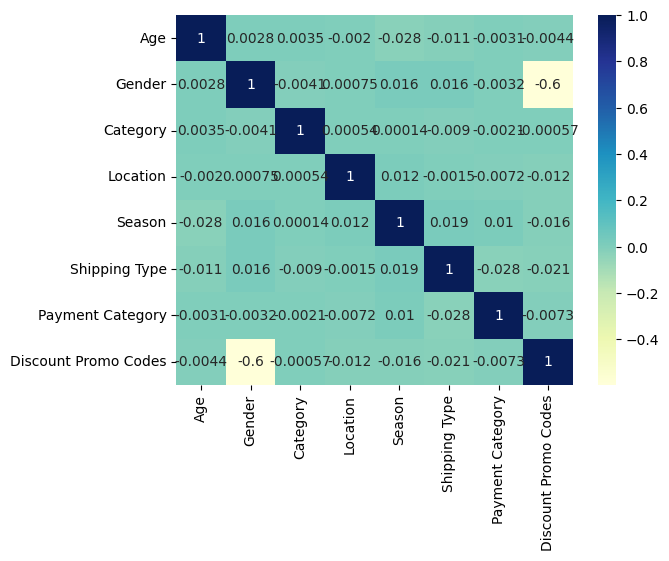

In [28]:
## zoom in on key attributes

shopping_behavior_vector_corr = shopping_behavior_vector[['Age', 'Gender', 'Category','Location', 'Season', 'Shipping Type', 'Payment Category', 'Discount Promo Codes' ]]
sns.heatmap(shopping_behavior_vector_corr.corr(), cmap="YlGnBu", annot=True)

In [29]:
shopping_behavior_vector

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Payment Category,Discount Promo Codes
0,1,55,1,2,1,53,16,0,7,3,3.1,1,1,1,1,14,5,3,2,0
1,2,19,1,23,1,64,18,0,12,3,3.1,1,1,1,1,2,1,3,0,0
2,3,50,1,11,1,73,20,2,12,1,3.1,1,2,1,1,23,2,6,1,0
3,4,21,1,14,2,90,38,1,12,1,3.5,1,3,1,1,49,4,6,2,0
4,5,45,1,2,1,49,36,1,21,1,2.7,1,2,1,1,31,4,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,0,9,1,28,45,0,21,2,4.2,0,0,0,0,32,5,6,2,1
3896,3897,52,0,0,0,49,14,0,23,1,4.5,0,5,0,0,41,0,1,0,1
3897,3898,46,0,1,0,33,29,0,8,1,2.9,0,4,0,0,24,5,5,2,1
3898,3899,44,0,17,2,77,22,2,3,2,3.8,0,1,0,0,24,5,6,2,1
